# Task 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")

In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape


(7043, 21)

In [5]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [9]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.drop('customerID', axis=1, inplace=True)


In [11]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [12]:
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [14]:
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [15]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
X_train.shape, X_test.shape


((5634, 19), (1409, 19))

# Task 2: Exploratory Data Analysis (EDA)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [19]:
churn_rate = df['Churn'].mean()
churn_rate


np.float64(0.2653698707936959)

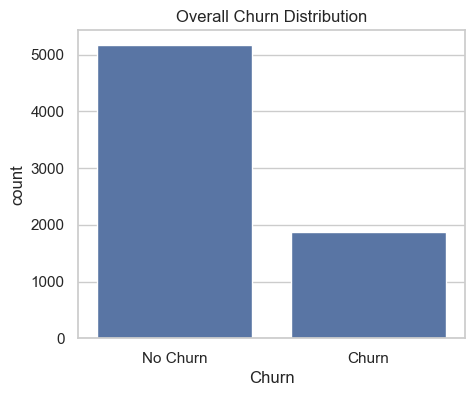

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Overall Churn Distribution")
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()


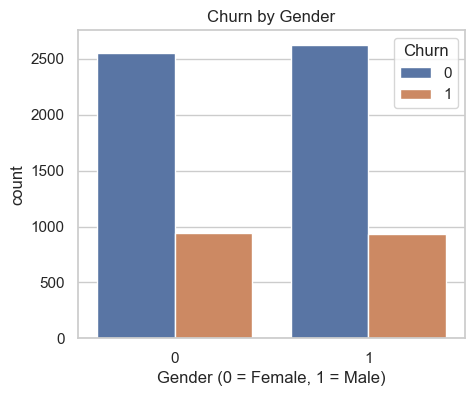

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.show()


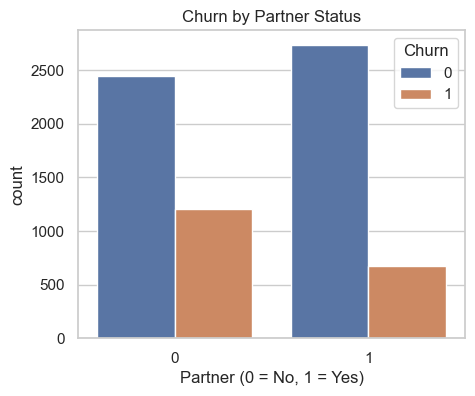

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title("Churn by Partner Status")
plt.xlabel("Partner (0 = No, 1 = Yes)")
plt.show()


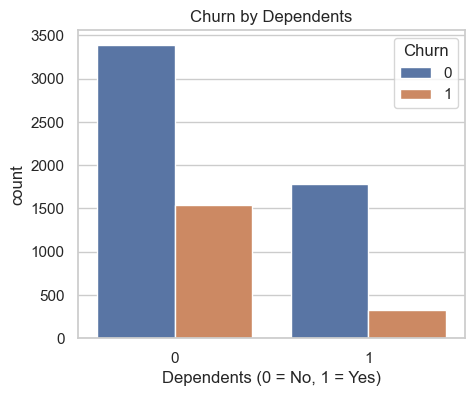

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title("Churn by Dependents")
plt.xlabel("Dependents (0 = No, 1 = Yes)")
plt.show()


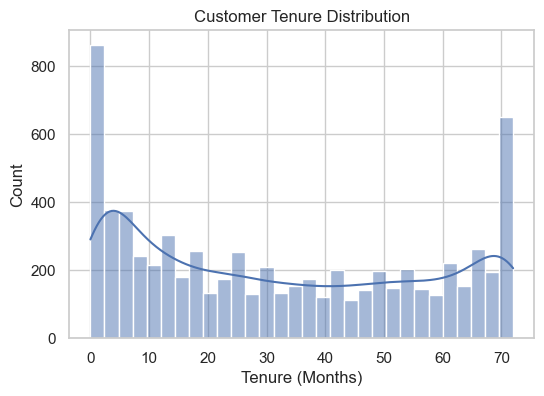

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.show()


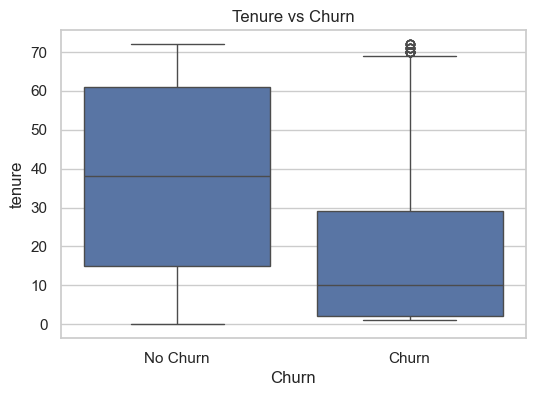

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()


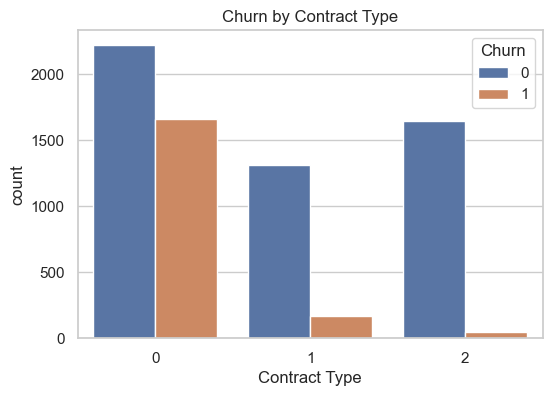

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.show()


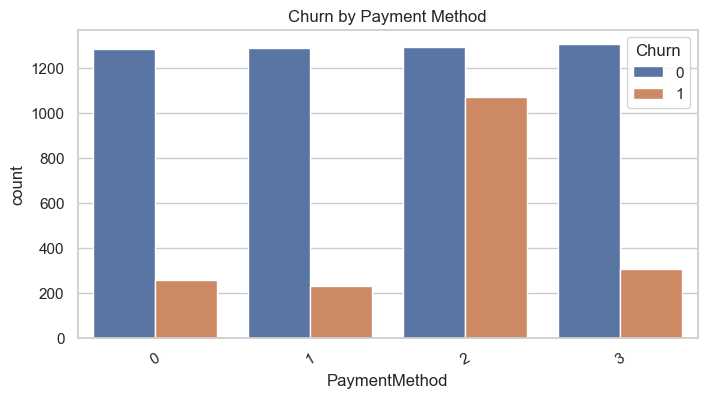

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()


In [28]:
df.groupby('Churn').mean()[['tenure', 'MonthlyCharges', 'TotalCharges']]


,tenure,MonthlyCharges,TotalCharges
Churn,,,
0,37.569965,61.265124,2552.882494
1,17.979133,74.441332,1531.796094


# Task 3: Customer Segmentation

In [29]:
segmentation_df = df[['tenure', 'MonthlyCharges', 'Contract', 'Churn']]
segmentation_df.head()


,tenure,MonthlyCharges,Contract,Churn
0,1,29.85,0,0
1,34,56.95,1,0
2,2,53.85,0,1
3,45,42.30,1,0
4,2,70.70,0,1


In [30]:
def tenure_segment(tenure):
    if tenure <= 12:
        return 'New Customer'
    elif tenure <= 48:
        return 'Mid-Term Customer'
    else:
        return 'Long-Term Customer'

df['TenureSegment'] = df['tenure'].apply(tenure_segment)


In [31]:
def charges_segment(charges):
    if charges <= 35:
        return 'Low Value'
    elif charges <= 70:
        return 'Medium Value'
    else:
        return 'High Value'

df['ChargesSegment'] = df['MonthlyCharges'].apply(charges_segment)


In [32]:
contract_map = {
    0: 'Month-to-Month',
    1: 'One Year',
    2: 'Two Year'
}

df['ContractType'] = df['Contract'].map(contract_map)


In [33]:
tenure_churn = df.groupby('TenureSegment')['Churn'].mean().reset_index()
tenure_churn


,TenureSegment,Churn
0,Long-Term Customer,0.095132
1,Mid-Term Customer,0.236440
2,New Customer,0.474382


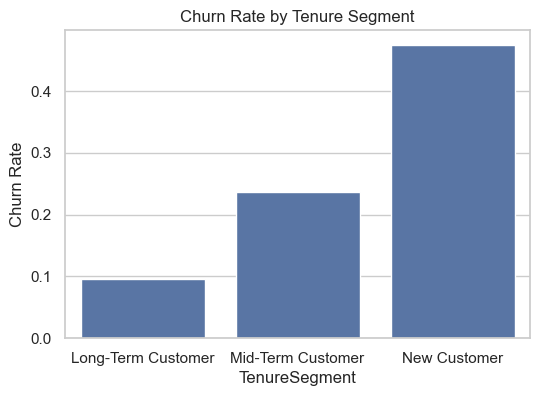

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x='TenureSegment', y='Churn', data=tenure_churn)
plt.title("Churn Rate by Tenure Segment")
plt.ylabel("Churn Rate")
plt.show()


In [35]:
charges_churn = df.groupby('ChargesSegment')['Churn'].mean().reset_index()
charges_churn


,ChargesSegment,Churn
0,High Value,0.353614
1,Low Value,0.108934
2,Medium Value,0.239420


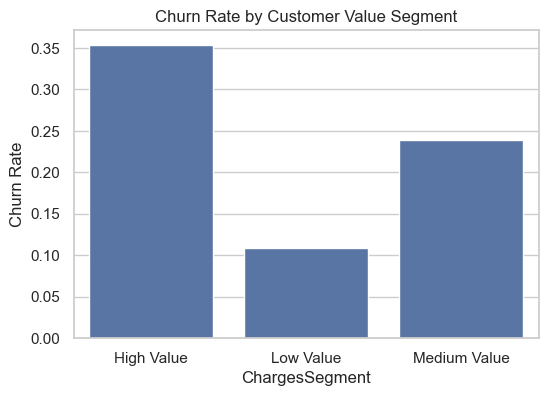

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x='ChargesSegment', y='Churn', data=charges_churn)
plt.title("Churn Rate by Customer Value Segment")
plt.ylabel("Churn Rate")
plt.show()


In [37]:
contract_churn = df.groupby('ContractType')['Churn'].mean().reset_index()
contract_churn


,ContractType,Churn
0,Month-to-Month,0.427097
1,One Year,0.112695
2,Two Year,0.028319


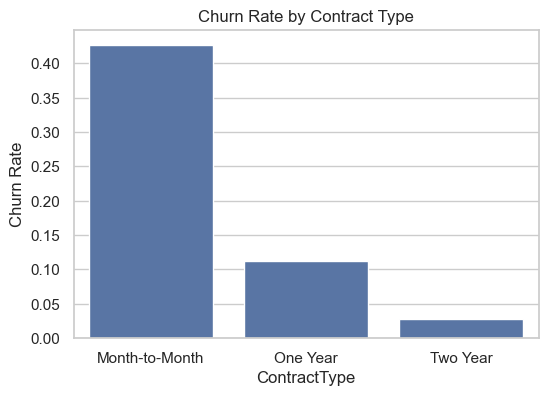

In [38]:
plt.figure(figsize=(6,4))
sns.barplot(x='ContractType', y='Churn', data=contract_churn)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


In [39]:
high_risk_customers = df[
    (df['ChargesSegment'] == 'High Value') &
    (df['ContractType'] == 'Month-to-Month') &
    (df['Churn'] == 1)
]

high_risk_customers.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureSegment,ChargesSegment,ContractType
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,New Customer,High Value,Month-to-Month
5,0,0,0,0,8,1,2,1,0,0,...,2,0,1,2,99.65,820.50,1,New Customer,High Value,Month-to-Month
8,0,0,1,0,28,1,2,1,0,0,...,2,0,1,2,104.80,3046.05,1,Mid-Term Customer,High Value,Month-to-Month
13,1,0,0,0,49,1,2,1,0,2,...,2,0,1,0,103.70,5036.30,1,Long-Term Customer,High Value,Month-to-Month
26,1,0,1,1,47,1,2,1,0,2,...,2,0,1,2,99.35,4749.15,1,Mid-Term Customer,High Value,Month-to-Month


In [40]:
high_risk_customers.shape[0]


1105

In [41]:
segment_summary = df.groupby(
    ['TenureSegment', 'ChargesSegment', 'ContractType']
)['Churn'].mean().reset_index()

segment_summary.head(10)


,TenureSegment,ChargesSegment,ContractType,Churn
0,Long-Term Customer,High Value,Month-to-Month,0.286765
1,Long-Term Customer,High Value,One Year,0.170901
2,Long-Term Customer,High Value,Two Year,0.049563
3,Long-Term Customer,Low Value,Month-to-Month,0.111111
4,Long-Term Customer,Low Value,One Year,0.026667
5,Long-Term Customer,Low Value,Two Year,0.008219
6,Long-Term Customer,Medium Value,Month-to-Month,0.163934
7,Long-Term Customer,Medium Value,One Year,0.047619
8,Long-Term Customer,Medium Value,Two Year,0.023585
9,Mid-Term Customer,High Value,Month-to-Month,0.449948


# Task 4: Churn Prediction Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [43]:
# Drop segmentation columns before modeling
X = df.drop(
    ['Churn', 'TenureSegment', 'ChargesSegment', 'ContractType'],
    axis=1
)

y = df['Churn']



In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [45]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


C:\Users\jayes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [46]:
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))


Logistic Regression Results
Accuracy : 0.7984386089425124
Precision: 0.639751552795031
Recall   : 0.5508021390374331
F1 Score : 0.5919540229885057


In [47]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [48]:
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Results")
print(classification_report(y_test, y_pred_dt))


Decision Tree Results
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.52      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [49]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [50]:
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [51]:
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ]
})

model_results


,Model,Accuracy,F1 Score
0,Logistic Regression,0.798439,0.591954
1,Decision Tree,0.730305,0.505208
2,Random Forest,0.792051,0.562033


In [52]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


,Feature,Importance
18,TotalCharges,0.186841
17,MonthlyCharges,0.179192
4,tenure,0.154338
14,Contract,0.079631
16,PaymentMethod,0.050095
8,OnlineSecurity,0.049580
11,TechSupport,0.043603
0,gender,0.027892
7,InternetService,0.027789
9,OnlineBackup,0.027075


In [53]:
top_features = feature_importance['Feature'].head(10)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


In [54]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_top, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [55]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test_top)

print("Tuned Random Forest Results")
print(classification_report(y_test, y_pred_best))


Tuned Random Forest Results
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



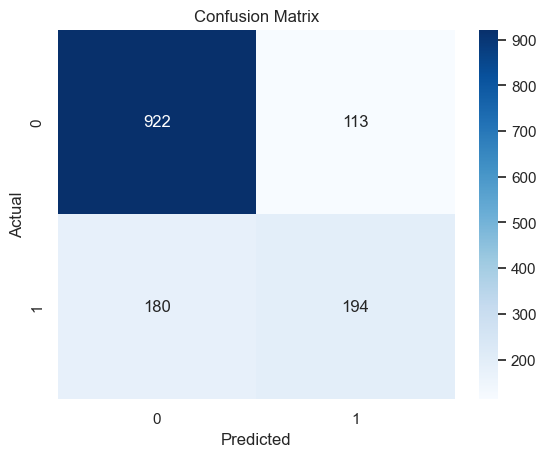

In [56]:
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Task 5: Model Evaluation and Interpretation

In [57]:
y_pred = best_rf.predict(X_test_top)


In [58]:
print("Final Model Evaluation")
print(classification_report(y_test, y_pred))


Final Model Evaluation
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



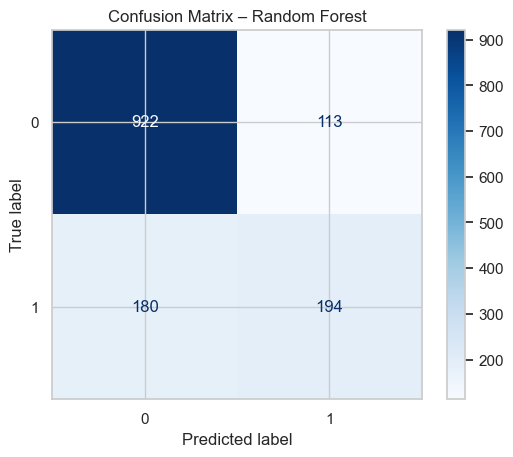

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    best_rf,
    X_test_top,
    y_test,
    cmap='Blues'
)
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [60]:
feature_importance = pd.DataFrame({
    'Feature': X_train_top.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
1,MonthlyCharges,0.187425
0,TotalCharges,0.184395
2,tenure,0.183582
3,Contract,0.148900
5,OnlineSecurity,0.078782
6,TechSupport,0.073598
4,PaymentMethod,0.044714
8,InternetService,0.042929
9,OnlineBackup,0.037774
7,gender,0.017902


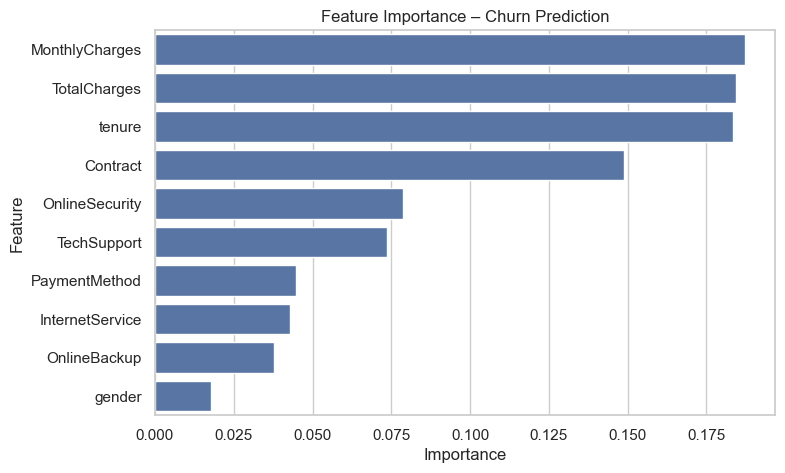

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance
)
plt.title("Feature Importance – Churn Prediction")
plt.show()


In [62]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef_df


,Feature,Coefficient
15,PaperlessBilling,0.389271
7,InternetService,0.236618
1,SeniorCitizen,0.165784
6,MultipleLines,0.087923
16,PaymentMethod,0.082850
2,Partner,0.038587
17,MonthlyCharges,0.023954
0,gender,0.011398
12,StreamingTV,0.003251
13,StreamingMovies,0.001045


In [63]:
y_prob = best_rf.predict_proba(X_test_top)[:, 1]


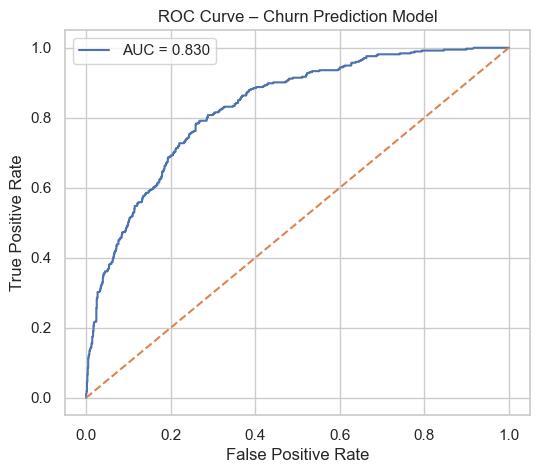

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Churn Prediction Model")
plt.legend()
plt.show()
